Epoch 1/50
9/9 [==============================] - 1s 28ms/step - loss: 3.6314 - accuracy: 0.0833 - val_loss: 3.3709 - val_accuracy: 0.2812
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 2.7577 - accuracy: 0.7083 - val_loss: 2.9533 - val_accuracy: 0.4688
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 1.7382 - accuracy: 0.9062 - val_loss: 2.1689 - val_accuracy: 0.6250
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.7165 - accuracy: 0.9931 - val_loss: 1.4034 - val_accuracy: 0.6875
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.1819 - accuracy: 0.9965 - val_loss: 1.0077 - val_accuracy: 0.7500
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.7902 - val_accuracy: 0.8750
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.6713 - val_accuracy: 0.8750
Epoch 8/50
9/9 [===============

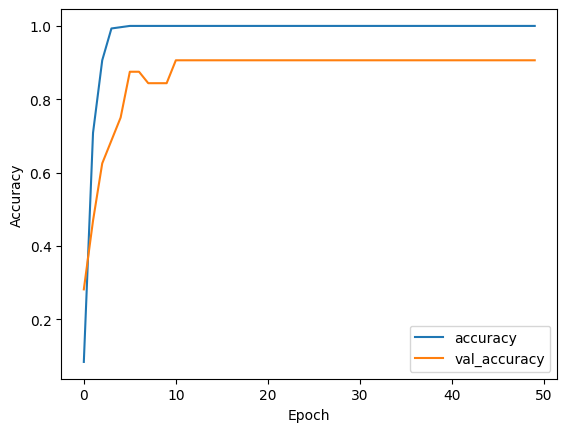

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense

# Load Olivetti Faces dataset
faces_data = fetch_olivetti_faces()
X = faces_data.data
y = faces_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
n_components = 100  # Number of principal components to keep
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the Neural Network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(n_components,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(40, activation='softmax')  # 40 output classes for 40 individuals in Olivetti dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
